# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import the neccesary library

In [153]:
df = pd.read_csv("bigcity.csv")

In [154]:
df.rename(columns={'u': '1920','x': '1930','Unnamed: 0': 'No.'},inplace=True)

This data seems to b numeric and shows the popullation in 1920 and 1930

In [155]:
df.head()

,No.,1920,1930
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 2. Explore the shape of dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [156]:
x = df['1920']
y = df['1930']

In [157]:
df.shape

(49, 3)

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [158]:
df.isna().count()

No.     49
1920    49
1930    49
dtype: int64

In [159]:
df1 = df.drop(['No.'], axis=1)

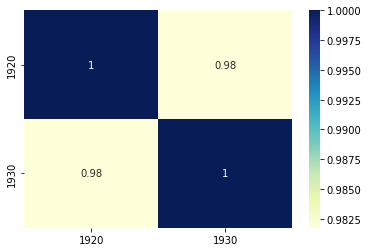

In [160]:
correlation_matrix = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True,)

In [161]:
print(df1.corr())

          1920      1930
1920  1.000000  0.981742
1930  0.981742  1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [162]:
y = df['1920'].values.reshape(-1, 1)
X = df['1930'].values.reshape(-1, 1)

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [164]:
SEED = 42

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [166]:
print(X_train) 
print(y_train)

[[ 79]
 [ 75]
 [115]
 [111]
 [260]
 [ 50]
 [ 63]
 [142]
 [ 50]
 [ 93]
 [ 50]
 [ 58]
 [ 89]
 [ 67]
 [ 85]
 [143]
 [130]
 [ 53]
 [ 63]
 [288]
 [ 53]
 [ 86]
 [104]
 [ 57]
 [ 69]
 [ 65]
 [183]
 [ 64]
 [ 58]
 [ 52]
 [634]
 [464]
 [ 54]
 [106]
 [ 48]
 [ 64]
 [317]
 [291]
 [113]]
[[ 71]
 [ 48]
 [120]
 [ 30]
 [179]
 [ 29]
 [ 64]
 [ 56]
 [ 43]
 [ 74]
 [  2]
 [ 50]
 [ 77]
 [ 67]
 [ 94]
 [138]
 [116]
 [ 45]
 [ 37]
 [256]
 [ 46]
 [ 66]
 [ 93]
 [ 60]
 [ 61]
 [ 46]
 [172]
 [ 50]
 [ 44]
 [ 38]
 [507]
 [381]
 [ 36]
 [ 78]
 [ 23]
 [ 40]
 [298]
 [243]
 [121]]


# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [167]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [168]:
df2 = regressor.fit(X_train, y_train)

For retrieving the slope (which is also the coefficient of x):

In [169]:
#Regression coefficients determine the slope of the line which is the change in the independent variable for the unit change in the independent variable. 
#If the cofficient is between 0.80 to 1.00 = Very strong positive correlation
#If the cofficient is between 0.20 to 0.79 = Positive correlation
#If the cofficient is between -0.30 to 0.19 = Negative correlation
#If the cofficient is between -0.29 to -1.00 = Very strong negaitive correlation

print(regressor.coef_)

[[0.83052779]]


In [170]:
#If the intercept has a negative sign : then the probability of having the outcome will be < 0.5.
#If the intercept has a positive sign : then the probability of having the outcome will be > 0.5.
#If the intercept is equal to zero    : then the probability of having the outcome will be exactly 0.5.

print(regressor.intercept_)

[-2.7894991]


# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

In [171]:
x = np.array(df['1920']) 
y = np.array(df['1930'])
n = np.size(x)

In [172]:
x

array([138,  93,  61, 179,  48,  37,  29,  23,  30,   2,  38,  46,  71,
        25, 298,  74,  50,  76, 381, 387,  78,  60, 507,  50,  77,  64,
        40, 136, 243, 256,  94,  36,  45,  67, 120, 172,  66,  46, 121,
        44,  64,  56,  40, 116,  87,  43,  43, 161,  36])

In [173]:
y

array([143, 104,  69, 260,  75,  63,  50,  48, 111,  50,  52,  53,  79,
        57, 317,  93,  58,  80, 464, 459, 106,  57, 634,  64,  89,  77,
        60, 139, 291, 288,  85,  46,  53,  67, 115, 183,  86,  65, 113,
        58,  63, 142,  64, 130, 105,  61,  50, 232,  54])

In [174]:
#Bo is the y-intercept, the value of y when x=0. 
#B1 is the slope or how y changes per unit increase in x.
#The slope of the regression line is b1 = Sxy / Sx^2,
#The intercept is b0 = ymean - b1 xmean,

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean

#If b1 is positive, then as X increases, Y increases as well. 
#This means that they vary directly with one another. Thus, if, in the regression model, b1 is positive, we say there is b. a direct linear relationship between X and Y.
b1 = Sxy/Sxx

#Negative b0 value = This simply means that the expected value on your dependent variable will be less than 0 when all independent/predictor variables are set to 0.
#Positive b0 value = This simply means that the expected value on your dependent variable will be more than 0 when all independent/predictor variables are set to 1.
b0 = y_mean-b1*x_mean
print('Slope b1 is :', b1)
print('Intercept b0 is :', b0)


Slope b1 is : 1.1577337039322437
Intercept b0 is : 8.383956333192671


Text(0, 0.5, 'y')

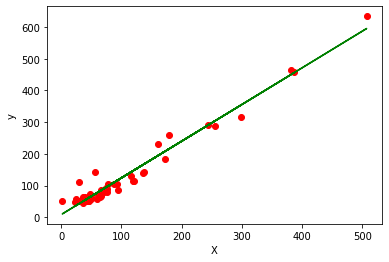

In [175]:
y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')


#This graph indictes that there are higher chance where population of the city are less than 200000 in 1920 and 1930.

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [176]:
error = y - y_pred
se = np.sum(error**2)

#Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. 
#There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect
mse = se/n

#Root Mean Squared Error is the square root of Mean Squared error.
#Since the RMSE is measured on the same scale, with the same units as y , one can expect 68% of the y values to be within 1 RMSE - given the data is normally distributed.
rmse = np.sqrt(mse)
print('Root mean square error is', rmse)
SSt = np.sum((y - y_mean)**2)

#It measures the average difference between values predicted by a model and the actual values
#In general, the higher the R-squared, the better the model fits your data.
R2 = 1- (se/SSt)
print('R square is', R2)

Root mean square error is 23.179613486957937
R square is 0.963817258548811


# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [177]:
test_score = regressor.score(X_test, y_test)

In [178]:
#A model with a higher accuracy is considered to be a better classifier.

test_score 

0.98035367389296

In [179]:
train_score = regressor.score(X_train, y_train)

In [180]:
train_score

0.9596126269828565